Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170. Данная промежуточная аттестация оценивается по системе "зачет" / "не зачет". "Зачет" ставится, если Слушатель успешно выполнил задание. "Незачет" ставится, если Слушатель не выполнил задание. Критерии оценивания: 1 - Слушатель провел дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.

In [15]:
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt 

y1 = np.array([173, 175, 180, 178, 177, 185, 183, 182])
y2 = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
y3 = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

k=3
n=len(y1)+len(y2)+len(y3)



In [16]:
# Тест на нормальность

stats.shapiro(y1), stats.shapiro(y2), stats.shapiro(y3)

(ShapiroResult(statistic=0.9775082468986511, pvalue=0.9495404362678528),
 ShapiroResult(statistic=0.9579196572303772, pvalue=0.7763139009475708),
 ShapiroResult(statistic=0.9386808276176453, pvalue=0.5051165223121643))

In [17]:
# pvalue больше 0,05 - распределение нормальное

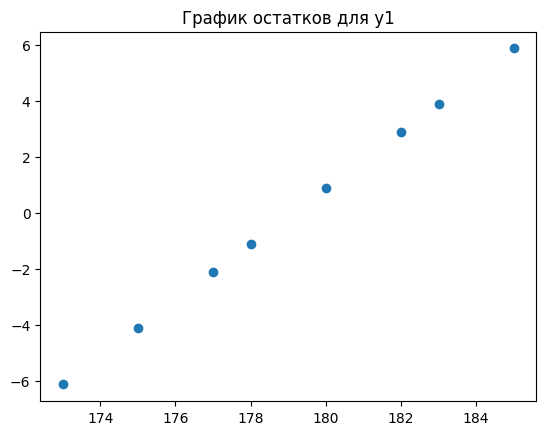

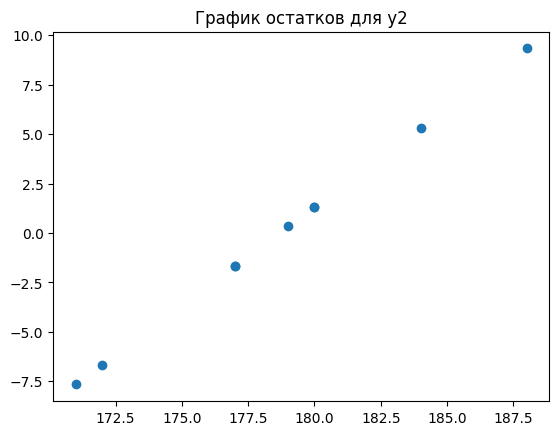

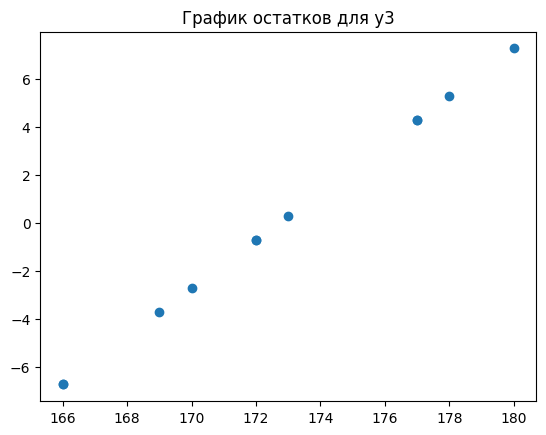

In [18]:
# Тест на гомоскедастичность
# Строим графики остатков
plt.figure(1)
plt.plot(y1, y1 - y1.mean(), 'o')
plt.title('График остатков для y1')

plt.figure(2)
plt.plot(y2, y2 - y2.mean(), 'o')
plt.title('График остатков для y2')

plt.figure(3)
plt.plot(y3, y3 - y3.mean(), 'o')
plt.title('График остатков для y3')

plt.show()

Данные гомоскедастичны

Определим средние арифметические каждого ряда и общее среднее

In [19]:
y_mean_1 = np.mean(y1)
y_mean_1

179.125

In [20]:
y_mean_2 = np.mean(y2)
y_mean_2

178.66666666666666

In [21]:
y_mean_3 = np.mean(y3)
y_mean_3

172.72727272727272

In [22]:
total = np.hstack((y1,y2,y3)).ravel()
total

array([173, 175, 180, 178, 177, 185, 183, 182, 177, 179, 180, 188, 177,
       172, 171, 184, 180, 172, 173, 169, 177, 166, 180, 178, 177, 172,
       166, 170])

In [23]:
y_mean_total = np.mean(total)
y_mean_total

176.46428571428572

In [24]:
# Сумма квадратов отклонений наблюдений от общего среднего

np.sum((total-176.464)**2)

830.9642879999998

In [25]:
# Сумма квадратов отклонений средних групповых значений от общего среднего

S_f = np.sum((y_mean_1 - y_mean_total)**2)*len(y1) + np.sum((y_mean_2 - y_mean_total)**2)*len(y2) + np.sum((y_mean_3 - y_mean_total)**2)*len(y3)
S_f

253.9074675324678

In [26]:
# Остаточная сумма отклонений 

S_ost = np.sum((y1-y_mean_1)**2) + np.sum((y2-y_mean_2)**2) +np.sum((y3-y_mean_3)**2)
S_ost

577.0568181818182

In [27]:
# Факторная дисперсия

D_f = S_f/(k-1)
D_f

126.9537337662339

In [28]:
# Остаточная дисперсия

D_ost = S_ost/(n-k)
D_ost

23.08227272727273

In [29]:
# Наблюдаемый критерий Фишера

F_n = D_f/D_ost
F_n

5.500053450812598

In [30]:
# Расчетный критерий Фишера

f = stats.f_oneway(y1, y2, y3)
f

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698693)

In [31]:
# Табличный куритерий Фишера

F = stats.f.ppf(0.95, (k-1), (n-k))
F

3.3851899614491683

Расчетное значение $ 5.5 $ попадает в область принятия альтернативной гипотезы. Так же нам об этом говорит pvalue = $0.01$ которое меньше 0,05

**Таким образом имеются статистически значимые различия между ростом футболистов, хоккеистов и штангистов**